Hill Climbing - Path Length: 76.89398075248626
Hill Climbing - The solution is 
 [6, 7, 5, 2, 1, 0, 4, 3, 9, 8, 10]
Hill Climbing - Visited Nodes: 726
Hill Climbing - Stored Nodes: 66
First Search - Path Length: 107.59796710491598
First Search - The solution is 
 [3, 4, 5, 9, 8, 2, 1, 0, 6, 10, 7]
First Search - Visited Nodes: 12100
First Search - Stored Nodes: 1100
Random Restart - Path Length: 75.30062096264228
Random Restart - The solution is 
 [7, 6, 10, 8, 9, 4, 3, 0, 1, 2, 5]
Random Restart - Visited Nodes: 54329
Random Restart - Stored Nodes: 4939
Stochastic - Path Length: 77.12445273485913
Stochastic - The solution is 
 [4, 3, 9, 8, 7, 10, 6, 5, 2, 1, 0]
Stochastic - Visited Nodes: 1210000
Stochastic - Stored Nodes: 110000
Simulated Annealing - Path Length: 97.38720354538526
Simulated Annealing - The solution is 
 [4, 0, 1, 7, 10, 6, 5, 2, 3, 8, 9]
Simulated Annealing - Visited Nodes: 1210000
Simulated Annealing - Stored Nodes: 110000
Local Beam Search - Path Length: 75.3006209

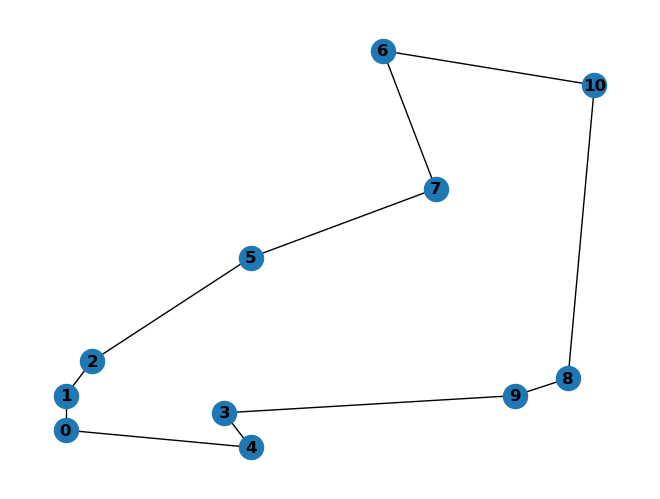

In [9]:
import numpy as np
import random
import math
import networkx as nx
import matplotlib.pyplot as plt

# adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)):
            p = np.linalg.norm(coordinate[i] - coordinate[j])    # Euclidean Distance
            matrix.append(p)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))
    return matrix

# find a random solution
def solution(matrix):
    points = list(range(0, len(matrix)))
    random.shuffle(points)
    return points

# calculate the path based on the solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]]
    return cycle_length

# generate neighbors of the solution by swapping cities and return the best neighbor
def neighbors(matrix, solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)

    best_neighbor = neighbors[0]
    best_path = path_length(matrix, best_neighbor)

    for neighbor in neighbors:
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_path = current_path
            best_neighbor = neighbor
    return best_neighbor, best_path

# Hill Climbing
def hill_climbing(coordinate):
    matrix = generate_matrix(coordinate)
    visited_nodes = 0
    stored_nodes = 0

    current_solution = solution(matrix)
    current_path = path_length(matrix, current_solution)
    neighbor = neighbors(matrix, current_solution)[0]
    best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)
    visited_nodes += len(matrix) * len(matrix)
    stored_nodes += len(matrix)

    while best_neighbor_path < current_path:
        current_solution = best_neighbor
        current_path = best_neighbor_path
        neighbor = neighbors(matrix, current_solution)[0]
        best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)
        visited_nodes += len(matrix) * len(matrix)
        stored_nodes += len(matrix)

    return current_solution, current_path, visited_nodes, stored_nodes

# First Search
def first_search(coordinate, num_restarts):
    best_solution = None
    best_path = float('inf')
    visited_nodes = 0
    stored_nodes = 0

    for _ in range(num_restarts):
        current_solution = solution(generate_matrix(coordinate))
        current_path = path_length(generate_matrix(coordinate), current_solution)
        visited_nodes += len(coordinate) * len(coordinate)
        stored_nodes += len(coordinate)

        if current_path < best_path:
            best_path = current_path
            best_solution = current_solution

    return best_solution, best_path, visited_nodes, stored_nodes

# Random Restart
def random_restart(coordinate, num_restarts):
    best_solution = None
    best_path = float('inf')
    visited_nodes = 0
    stored_nodes = 0

    for _ in range(num_restarts):
        current_solution, current_path, current_visited_nodes, current_stored_nodes = hill_climbing(coordinate)
        visited_nodes += current_visited_nodes
        stored_nodes += current_stored_nodes

        if current_path < best_path:
            best_path = current_path
            best_solution = current_solution

    return best_solution, best_path, visited_nodes, stored_nodes

# Stochastic
def stochastic(coordinate, max_iterations):
    current_solution = solution(generate_matrix(coordinate))
    current_path = path_length(generate_matrix(coordinate), current_solution)
    visited_nodes = 0
    stored_nodes = 0

    for _ in range(max_iterations):
        neighbor = neighbors(generate_matrix(coordinate), current_solution)[0]
        best_neighbor, best_neighbor_path = neighbors(generate_matrix(coordinate), neighbor)
        visited_nodes += len(coordinate) * len(coordinate)
        stored_nodes += len(coordinate)

        if best_neighbor_path < current_path:
            current_solution = best_neighbor
            current_path = best_neighbor_path

    return current_solution, current_path, visited_nodes, stored_nodes

# Simulated Annealing
def simulated_annealing(coordinate, max_iterations, initial_temperature, cooling_rate):
    current_solution = solution(generate_matrix(coordinate))
    current_path = path_length(generate_matrix(coordinate), current_solution)
    visited_nodes = 0
    stored_nodes = 0

    temperature = initial_temperature

    for _ in range(max_iterations):
        neighbor = neighbors(generate_matrix(coordinate), current_solution)[0]
        best_neighbor, best_neighbor_path = neighbors(generate_matrix(coordinate), neighbor)
        visited_nodes += len(coordinate) * len(coordinate)
        stored_nodes += len(coordinate)

        if best_neighbor_path < current_path or random.random() < math.exp((current_path - best_neighbor_path) / temperature):
            current_solution = best_neighbor
            current_path = best_neighbor_path

        temperature *= cooling_rate

    return current_solution, current_path, visited_nodes, stored_nodes

# Local Beam Search
def local_beam(coordinate, num_states, max_iterations):
    states = [solution(generate_matrix(coordinate)) for _ in range(num_states)]
    current_path = float('inf')
    best_solution = None
    visited_nodes = 0
    stored_nodes = 0

    for _ in range(max_iterations):
        next_states = []
        for state in states:
            neighbor = neighbors(generate_matrix(coordinate), state)[0]
            next_states.append(neighbor)

        next_states.sort(key=lambda x: path_length(generate_matrix(coordinate), x))
        states = next_states[:num_states]

        if path_length(generate_matrix(coordinate), states[0]) < current_path:
            best_solution = states[0]
            current_path = path_length(generate_matrix(coordinate), states[0])

    visited_nodes += len(coordinate) * len(coordinate) * max_iterations
    stored_nodes += len(coordinate) * num_states * max_iterations

    return best_solution, current_path, visited_nodes, stored_nodes

coordinate = np.array([[1, 2], [1, 4], [2, 6], [7, 3], [8, 1], [8, 12], [13, 24], [15, 16], [20, 5], [18, 4], [21, 22]])

# Hill Climbing

final_solution_hill_climbing = hill_climbing(coordinate)

print("Hill Climbing - Path Length:", final_solution_hill_climbing[1])
print("Hill Climbing - The solution is \n", final_solution_hill_climbing[0])

print("Hill Climbing - Visited Nodes:", final_solution_hill_climbing[2])
print("Hill Climbing - Stored Nodes:", final_solution_hill_climbing[3])

# First Search

final_solution_first_search = first_search(coordinate, 100)

print("First Search - Path Length:", final_solution_first_search[1])
print("First Search - The solution is \n", final_solution_first_search[0])

print("First Search - Visited Nodes:", final_solution_first_search[2])
print("First Search - Stored Nodes:", final_solution_first_search[3])

# Random Restart

final_solution_random_restart = random_restart(coordinate, 100)

print("Random Restart - Path Length:", final_solution_random_restart[1])
print("Random Restart - The solution is \n", final_solution_random_restart[0])

print("Random Restart - Visited Nodes:", final_solution_random_restart[2])
print("Random Restart - Stored Nodes:", final_solution_random_restart[3])

# Stochastic

final_solution_stochastic = stochastic(coordinate, 10000)

print("Stochastic - Path Length:", final_solution_stochastic[1])
print("Stochastic - The solution is \n", final_solution_stochastic[0])

print("Stochastic - Visited Nodes:", final_solution_stochastic[2])
print("Stochastic - Stored Nodes:", final_solution_stochastic[3])

# Simulated Annealing

final_solution_simulated_annealing = simulated_annealing(coordinate, 10000, 100, 0.99)

print("Simulated Annealing - Path Length:", final_solution_simulated_annealing[1])
print("Simulated Annealing - The solution is \n", final_solution_simulated_annealing[0])

print("Simulated Annealing - Visited Nodes:", final_solution_simulated_annealing[2])
print("Simulated Annealing - Stored Nodes:", final_solution_simulated_annealing[3])

# Local Beam Search

final_solution_local_beam = local_beam(coordinate, 5, 100)

print("Local Beam Search - Path Length:", final_solution_local_beam[1])
print("Local Beam Search - The solution is \n", final_solution_local_beam[0])

print("Local Beam Search - Visited Nodes:", final_solution_local_beam[2])
print("Local Beam Search - Stored Nodes:", final_solution_local_beam[3])

# Plotting the final path
G = nx.Graph()
G.add_nodes_from(range(len(coordinate)))
for i in range(len(final_solution_hill_climbing[0])):
    G.add_edge(final_solution_hill_climbing[0][i], final_solution_hill_climbing[0][(i + 1) % len(final_solution_hill_climbing[0])])

pos = {i: coordinate[i] for i in range(len(coordinate))}
nx.draw(G, pos, with_labels=True, font_weight='bold')
plt.show()
